In [7]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np # Often useful for numerical operations
import matplotlib.pyplot as plt # For basic visualizations
import seaborn as sns # For enhanced statistical visualizations

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size

# 2. Load the dataset.
try:
    df = pd.read_excel( r"C:\Users\janan\OneDrive\Desktop\Datasets\Netflix Dataset.xlsx")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please check the file path.")
    exit()

# 3. Initial Data Inspection
print("\n--- Initial Data Inspection ---")
print(f"Number of Records: {df.shape[0]}, Number of Columns: {df.shape[1]}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nColumn names and data types:")
print(df.info())

Dataset loaded successfully!

--- Initial Data Inspection ---
Number of Records: 7789, Number of Columns: 11

First 5 rows of the dataset:
  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2

In [10]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [12]:
# --- 1. Handle Duplicates ---
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Duplicates removed: {initial_rows - df.shape[0]} rows dropped.")

Duplicates removed: 0 rows dropped.


In [19]:
df.duplicated().sum()

0

In [24]:
# Impute 'Director', 'Cast', and 'Country' with 'Unknown'
for col in ['Director', 'Cast', 'Country']:
    df[col].fillna('Unknown', inplace=True)

# Impute 'Rating' with the Mode (most frequent rating)
mode_rating = df['Rating'].mode()[0]
df['Rating'].fillna(mode_rating, inplace=True)


In [25]:
# Drop rows where 'Release_Date' is null (only 10 rows)
# This is preferred for date columns to avoid skewing time-series analysis
df.dropna(subset=['Release_Date'], inplace=True)

# Final check of null values
print("\nFinal Null Count:")
print(df.isnull().sum())
print(f"\nFinal DataFrame shape: {df.shape}")


Final Null Count:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

Final DataFrame shape: (7777, 11)


In [26]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [29]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7777,7777,7777.00,7777,7777,7777,7777,7777,7777,7777,7777
unique,7777,2,7777.00,4051,6822,682,1565,14,216,491,7759
top,s1,Movie,0.03,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1.00,2378,718,2549,118,2868,1608,334,3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7777 non-null   object
 1   Category      7777 non-null   object
 2   Title         7777 non-null   object
 3   Director      7777 non-null   object
 4   Cast          7777 non-null   object
 5   Country       7777 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7777 non-null   object
 8   Duration      7777 non-null   object
 9   Type          7777 non-null   object
 10  Description   7777 non-null   object
dtypes: object(11)
memory usage: 729.1+ KB


In [33]:
import pandas as pd

# --- Corrected Data Type Conversion Code ---

# 1. Date Cleaning and Conversion
# Strip leading/trailing whitespace from the column before conversion
df['Release_Date'] = df['Release_Date'].str.strip()

# Convert 'Release_Date' to datetime. Using 'mixed' handles potential variations
# in date formats across the column (e.g., month/day/year vs. day/month/year).
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', errors='coerce')
print("-> 'Release_Date' successfully converted to datetime after stripping whitespace.")

# Create 'added_year' feature
df['added_year'] = df['Release_Date'].dt.year.astype('int16')
print("-> 'added_year' (int16) created for trend analysis.")


# 2. Duration Splitting and Conversion
# Split 'Duration'
df[['duration_int', 'duration_unit']] = df['Duration'].str.split(' ', expand=True)

# Convert numerical part to a nullable integer
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce').astype('Int16')
df.dropna(subset=['duration_int'], inplace=True) 
print("-> 'Duration' split and 'duration_int' converted.")


# 3. Categorical Conversion for Memory Efficiency
for col in ['Category', 'Rating', 'duration_unit']:
    if col in df.columns:
        df[col] = df[col].astype('category')
print("-> Categorical columns converted.")

# 4. Final Data Type Confirmation
print("\n--- Final DataFrame Information (Data Types Updated) ---")
df.info()

-> 'Release_Date' successfully converted to datetime after stripping whitespace.
-> 'added_year' (int16) created for trend analysis.
-> 'Duration' split and 'duration_int' converted.
-> Categorical columns converted.

--- Final DataFrame Information (Data Types Updated) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_Id        7777 non-null   object        
 1   Category       7777 non-null   category      
 2   Title          7777 non-null   object        
 3   Director       7777 non-null   object        
 4   Cast           7777 non-null   object        
 5   Country        7777 non-null   object        
 6   Release_Date   7777 non-null   datetime64[ns]
 7   Rating         7777 non-null   category      
 8   Duration       7777 non-null   object        
 9   Type           7777 non-null   object        
 10  Descri


--- Objective 1: Movies vs. TV Shows Trend ---


<Figure size 1500x700 with 0 Axes>

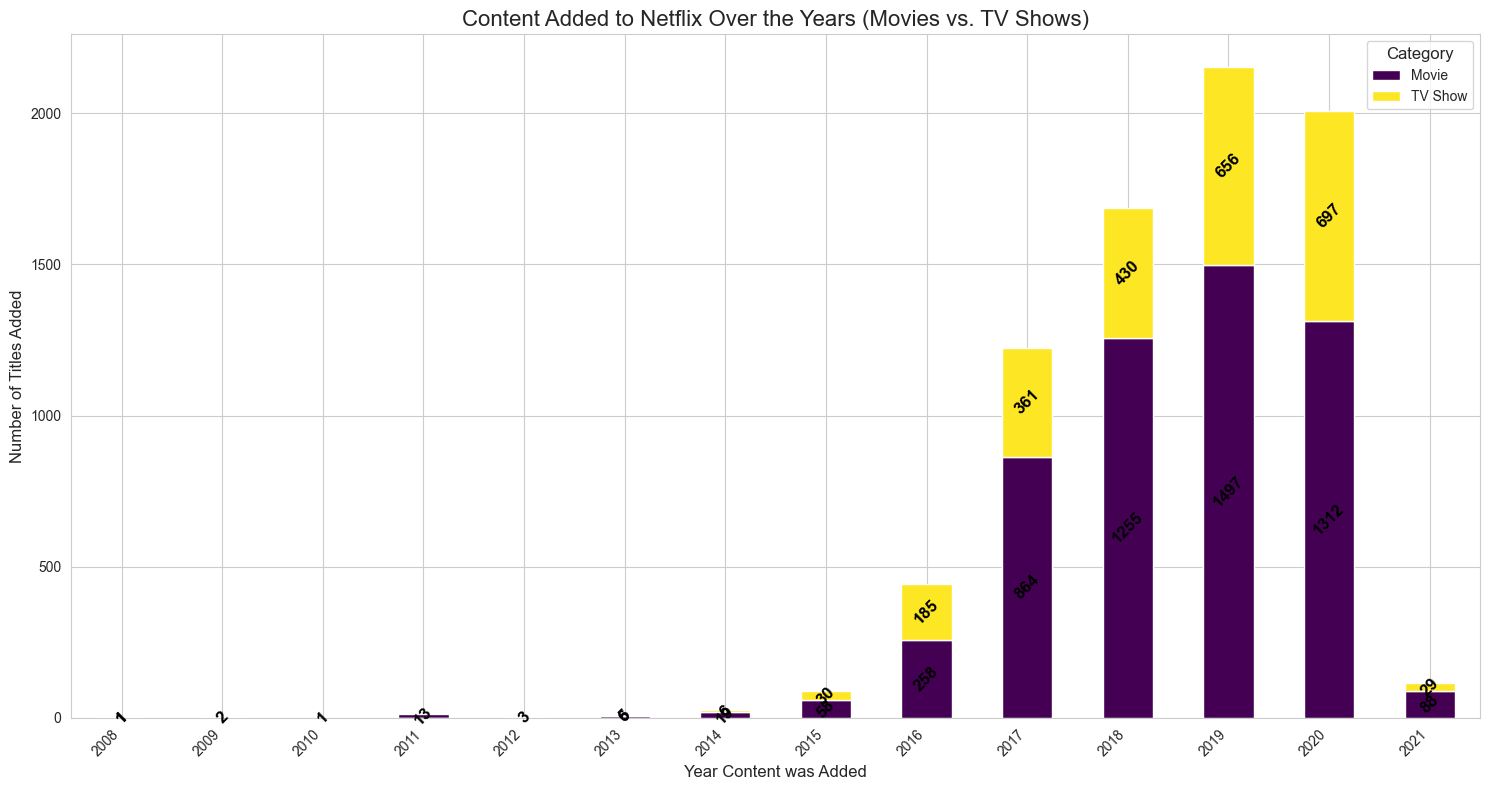

In [51]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# --- Objective 1: Movies vs. TV Shows Trend Over Time (WITH DATA LABELS) ---
print("\n--- Objective 1: Movies vs. TV Shows Trend ---")
yearly_content_trend = df.groupby(['added_year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 7))
# Assign the plot to an axis object (ax) to enable annotation
ax = yearly_content_trend.plot(kind='bar', stacked=True, cmap='viridis')

# --- CODE ADDED TO INCLUDE DATA LABELS ---
for container in ax.containers:
    # Iterate over the individual bar segments (patches)
    for patch in container.patches:
        h = patch.get_height()
        # Only label segments that have a count greater than zero
        if h > 0:
            # Calculate the x-position (center of the bar)
            x = patch.get_x() + patch.get_width() / 2.
            # Calculate the y-position (center of the segment)
            y = patch.get_y() + h / 2.
            
            # Add the text annotation (using a small font and rotation for fit)
            ax.text(x, y, f'{int(h)}', 
                    ha='center', va='center', 
                    color='black', fontsize=12, 
                    fontweight='bold', rotation=45) 
# ----------------------------------------

# --- Original Plot Formatting ---
ax.set_title('Content Added to Netflix Over the Years (Movies vs. TV Shows)', fontsize=16)
ax.set_xlabel('Year Content was Added', fontsize=12)
ax.set_ylabel('Number of Titles Added', fontsize=12)
ax.legend(title='Category', fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Objective 2: Top Genres ---

Top 10 Most Frequent Genres:
genre
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


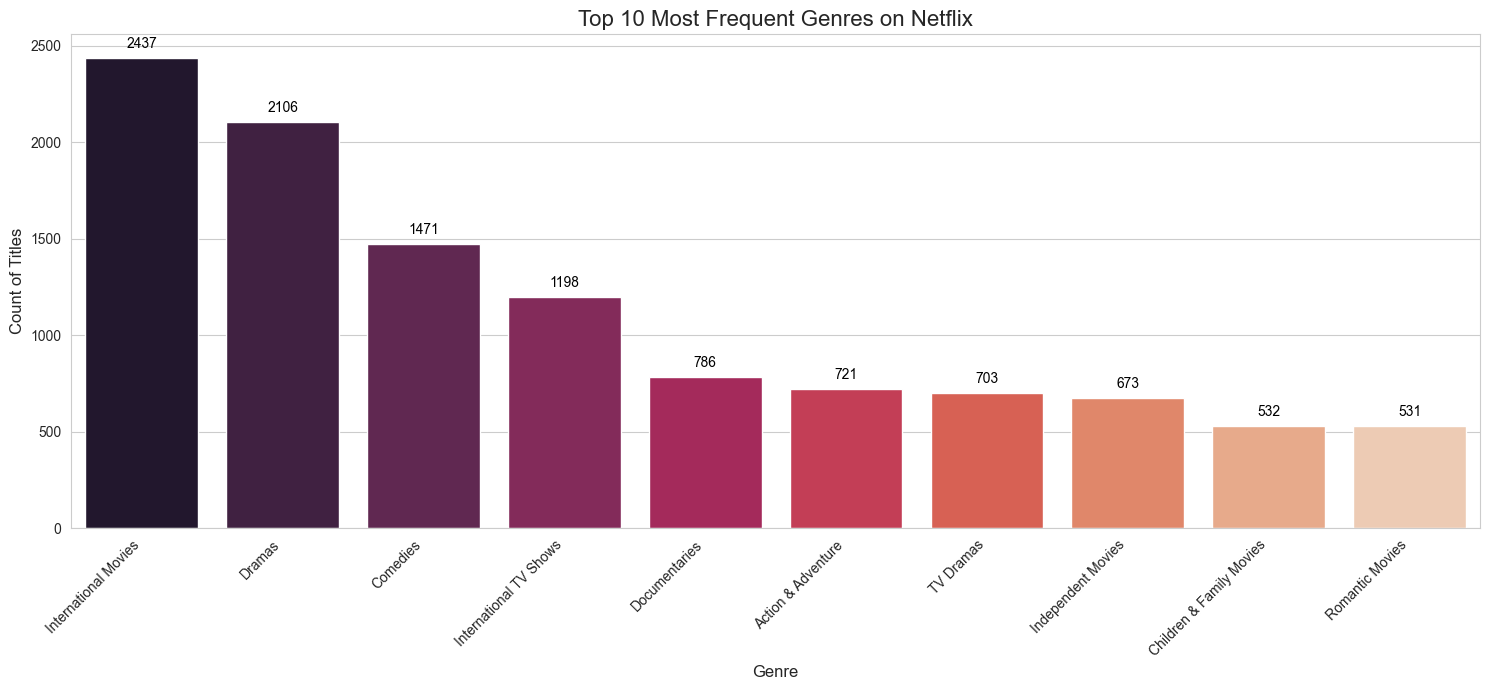

In [52]:
# --- 1. FEATURE ENGINEERING: Genre Explosion ---
# This step creates the 'genre' column and explodes the DataFrame
df_genre = df.copy()
df_genre['genre'] = df_genre['Type'].apply(lambda x: x.split(', '))
df_genre_exploded = df_genre.explode('genre')

# --- 2. ANALYSIS AND PLOTTING (With Data Labels) ---
print("\n--- Objective 2: Top Genres ---")

# Calculate the Top 10 Genres
top_genres = df_genre_exploded['genre'].value_counts().head(10)
print("\nTop 10 Most Frequent Genres:")
print(top_genres)

plt.figure(figsize=(15, 7))
# Create the bar plot and assign it to 'ax'
ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette="rocket")

# --- CODE ADDED TO INCLUDE DATA LABELS ---
for p in ax.patches:
    # Annotate with the height of the bar (the count)
    ax.annotate(f'{int(p.get_height())}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), # Position: center of bar, just above the top
               ha='center', va='bottom', fontsize=10, 
               color='black', xytext=(0, 5), textcoords='offset points')
# ----------------------------------------

# Plot Formatting
plt.title('Top 10 Most Frequent Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Objective 3: Country-wise Contributions ---

Top 10 Content-Contributing Countries:
country_list
United States     3290
India              990
United Kingdom     721
Canada             412
France             349
Japan              286
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


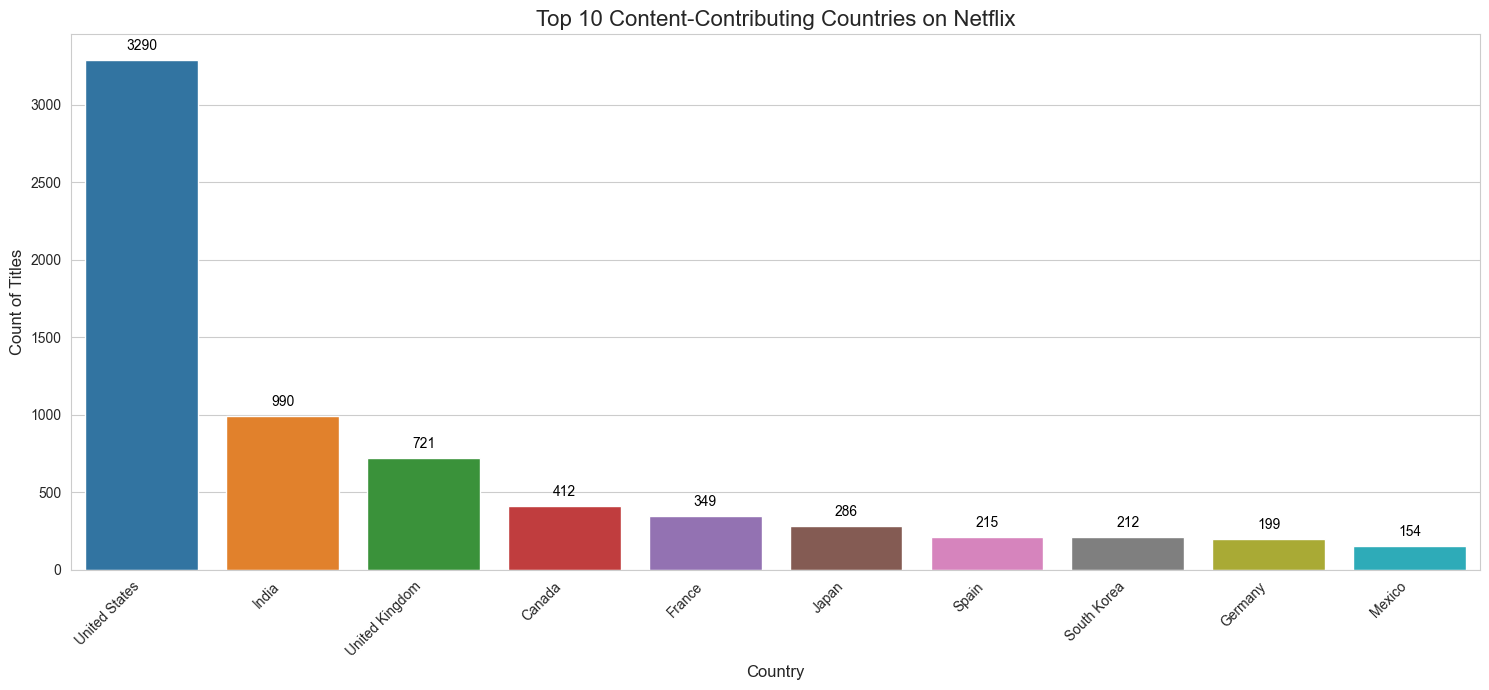

In [53]:
# --- 1. FEATURE ENGINEERING: Country Explosion ---
# This step creates the 'country_list' column and explodes the DataFrame
df_country = df.copy()
df_country['country_list'] = df_country['Country'].apply(lambda x: x.split(', '))
df_country_exploded = df_country.explode('country_list')

# --- 2. ANALYSIS AND PLOTTING (With Data Labels) ---
print("\n--- Objective 3: Country-wise Contributions ---")

# Calculate the Top 10 Contributing Countries (excluding the 'Unknown' placeholder)
top_countries = df_country_exploded[df_country_exploded['country_list'] != 'Unknown']['country_list'].value_counts().head(10)
print("\nTop 10 Content-Contributing Countries:")
print(top_countries)

plt.figure(figsize=(15, 7))
# Create the bar plot and assign it to 'ax'
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="tab10")

# --- CODE ADDED TO INCLUDE DATA LABELS ---
for p in ax.patches:
    # Annotate with the height of the bar (the count)
    ax.annotate(f'{int(p.get_height())}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), # Position: center of bar, just above the top
               ha='center', va='bottom', fontsize=10, 
               color='black', xytext=(0, 5), textcoords='offset points')
# ----------------------------------------

# Plot Formatting
plt.title('Top 10 Content-Contributing Countries on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
# --- Bonus Insight: Average Content Duration ---
print("\n--- Bonus Insight: Average Content Duration ---")
avg_duration = df.groupby('duration_unit')['duration_int'].mean().round(1)
print(f"Average Movie Duration: {avg_duration.get('min', 'N/A')} minutes")
print(f"Average TV Show Length: {avg_duration.get('Season', 'N/A')} seasons")


--- Bonus Insight: Average Content Duration ---
Average Movie Duration: 99.3 minutes
Average TV Show Length: 1.0 seasons


Top 5 Directors by Content Volume
director_name
Jan Suter              21
RaÃºl Campos           19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Name: count, dtype: int64


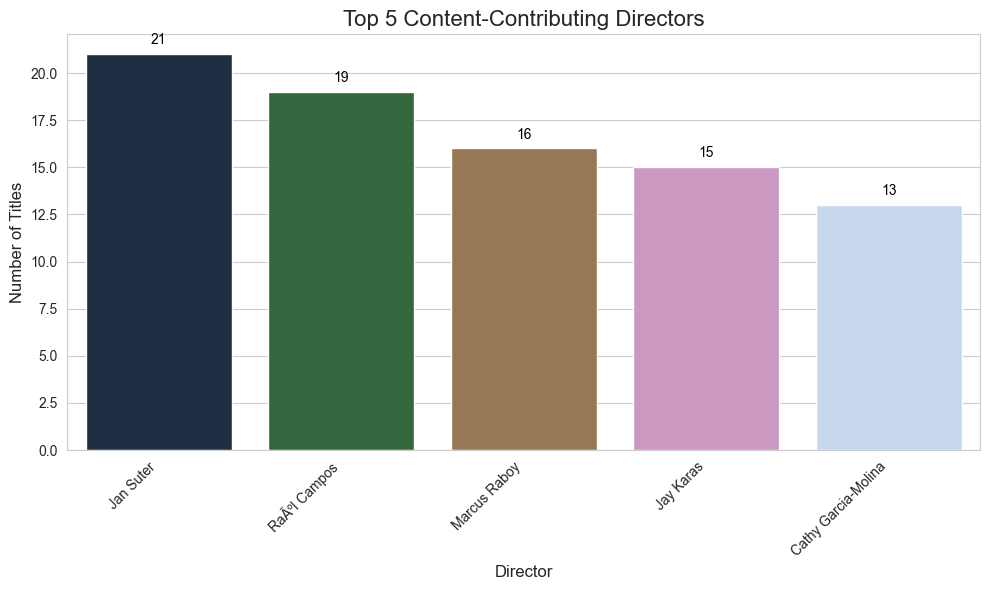

In [71]:
print("Top 5 Directors by Content Volume")

# Explode Director column to count contributions per individual (since Director is comma-separated)
df_director_exploded = df.copy()
# Note: Using 'Director' column name as per your dataset structure
df_director_exploded['director_name'] = df_director_exploded['Director'].apply(lambda x: x.split(', '))
df_director_exploded = df_director_exploded.explode('director_name')

# Calculate top 5, excluding the 'Unknown' placeholder
top_directors = df_director_exploded[df_director_exploded['director_name'].str.strip() != 'Unknown']['director_name'].value_counts().head(5)
print(top_directors)

plt.figure(figsize=(10, 6))
# Assign the plot to an axis object (ax) to enable annotation
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette="cubehelix")

# --- CODE ADDED TO INCLUDE DATA LABELS ---
for p in ax.patches:
    # Annotate with the height of the bar (the count)
    ax.annotate(f'{int(p.get_height())}', 
               (p.get_x() + p.get_width() / 2., p.get_height()), # Position: center of bar, just above the top
               ha='center', va='bottom', fontsize=10, 
               color='black', xytext=(0, 5), textcoords='offset points')
# ----------------------------------------

# Plot Formatting
plt.title('Top 5 Content-Contributing Directors', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Content Maturity Rating Distribution 
Rating
TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


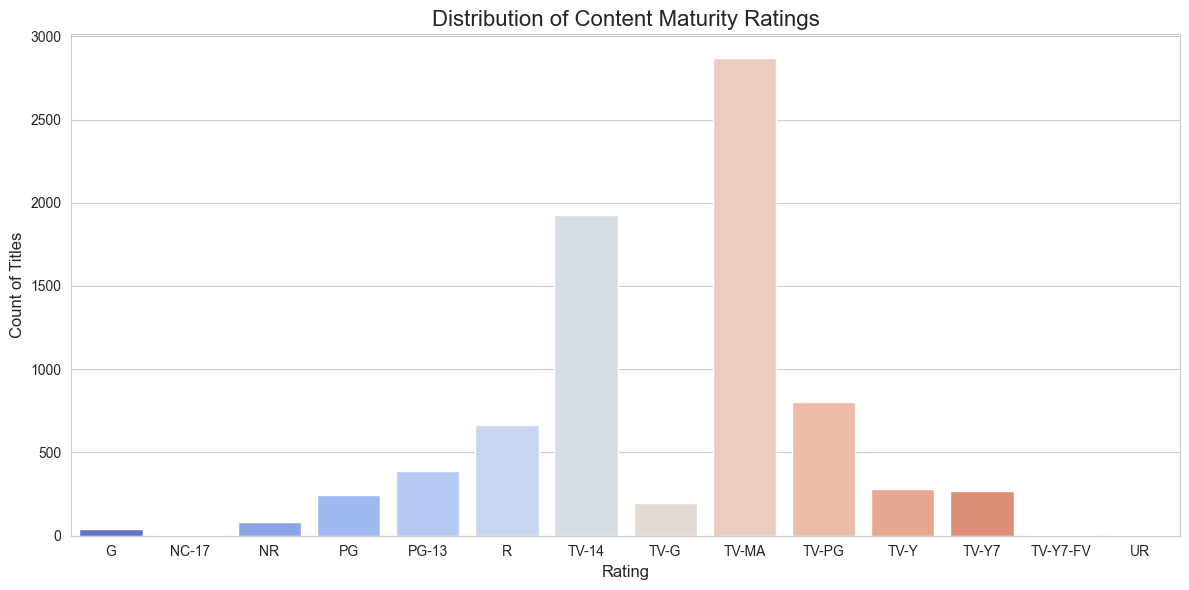

In [73]:
# Business Insight: Identifying key relationships (directors) whose content drives volume/viewership.

# --- Additional Insight 2: Content Maturity Rating Distribution ---

print(" Content Maturity Rating Distribution ")
rating_counts = df['Rating'].value_counts()
print(rating_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title('Distribution of Content Maturity Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.tight_layout()
plt.show()

# Business Insight: Understanding the core audience demographic (e.g., if TV-MA dominates, the target audience is primarily mature).
